<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenge" data-toc-modified-id="Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge</a></span></li><li><span><a href="#Workstation-setup" data-toc-modified-id="Workstation-setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Workstation setup</a></span><ul class="toc-item"><li><span><a href="#Motor-Alone-Setup" data-toc-modified-id="Motor-Alone-Setup-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Motor Alone Setup</a></span></li><li><span><a href="#Motor-Spring-Load-Setup" data-toc-modified-id="Motor-Spring-Load-Setup-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Motor-Spring-Load Setup</a></span></li></ul></li><li><span><a href="#Implementing-a-Controller-for-the-&quot;Motor-Alone&quot;-Configuration" data-toc-modified-id="Implementing-a-Controller-for-the-&quot;Motor-Alone&quot;-Configuration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Implementing a Controller for the "Motor Alone" Configuration</a></span><ul class="toc-item"><li><span><a href="#Model-Construction:-Motor-Alone" data-toc-modified-id="Model-Construction:-Motor-Alone-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><em>Model Construction:</em> Motor Alone</a></span></li><li><span><a href="#Controller-Design:-Motor-Alone" data-toc-modified-id="Controller-Design:-Motor-Alone-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><em>Controller Design:</em> Motor Alone</a></span></li><li><span><a href="#Controller-Validation:-Motor-Alone" data-toc-modified-id="Controller-Validation:-Motor-Alone-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><em>Controller Validation:</em> Motor Alone</a></span></li></ul></li><li><span><a href="#Implementing-a-Controller-for-the-Motor-Spring-Load" data-toc-modified-id="Implementing-a-Controller-for-the-Motor-Spring-Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Implementing a Controller for the Motor-Spring-Load</a></span><ul class="toc-item"><li><span><a href="#Model-Construction:-Motor-Spring-Load" data-toc-modified-id="Model-Construction:-Motor-Spring-Load-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><em>Model Construction:</em> Motor-Spring-Load</a></span></li><li><span><a href="#Controller-Design:-Motor-Spring-Load" data-toc-modified-id="Controller-Design:-Motor-Spring-Load-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><em>Controller Design:</em> Motor-Spring-Load</a></span></li><li><span><a href="#Controller-Validation:-Motor-Spring-Load" data-toc-modified-id="Controller-Validation:-Motor-Spring-Load-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span><em>Controller Validation:</em> Motor-Spring-Load</a></span></li></ul></li></ul></div>

## Challenge

Using the workstation and the encoders on the motor, you will control the velocity for two configurations of the electromechanical system using closed-loop control.

* Motor alone
* Motor with load connected with a compliant shaft (spring)

## Workstation setup

You will need to make several changes to your workstation to prepare it for use in the lab.  

We will be using your workstation's Arduino to implement the closed-loop control of the motor. We will be using a different H-Bridge than we did in labs 1-4. For this lab we will be using the DRV8838. The specifications for the circuit can be found at: www.pololu.com/product/2990. The diagram below shows the pinout:
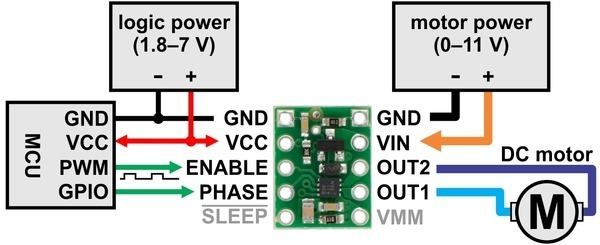

|  Pin  | Connection    | Description                   |
|:-----:|:-------------:|:-----------------------------:|
|GND    | Board Ground  |Need only connect 1 of the 2 GND pins |
|VCC    | +5V           |Power for chips on the board   |
|ENABLE | Arduino pin 46 (PWM)  |Controls motor voltage         |
|PHASE  | Arduino pin 48 (Digital)        |Controls direction     |
|VIN    | +5V           |Power supply for the motor     |
|OUT2   | + Motor 1     |H-Bridge output to motor       |
|OUT1   | - Motor 1     |H-Bridge output to motor       |
|Sleep  | Do not connect|                               |
|VMM    | Do not connect|                               |

**Install the H-bridge across the "IC GAP" on your breadboard and wire it following the wiring diagram above**

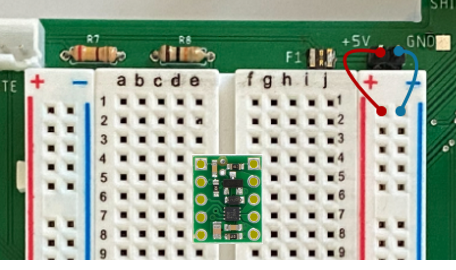

---

**Attach the motor wire to the MOTOR 1 connector**

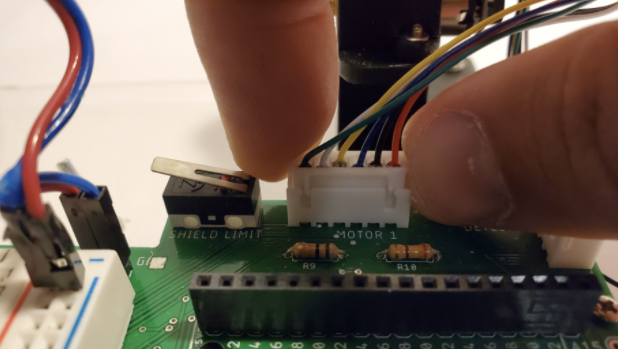

You will use 2 different motor configurations:

### Motor Alone Setup

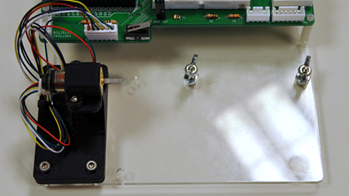

### Motor-Spring-Load Setup

Instructions on the assembly of the spring shaft can be found in the [hardware resource.](../Week08_Implementation_Resources/Week08_Hardware_Resource.ipynb#Assembling-and-installing-the-Spring-Shaft)

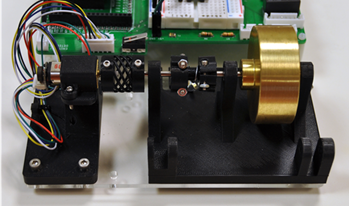

Note: The photographs taken without the shield for clarity. The shield does not have to be removed to install the mass or the spring shaft.

***Put an image of your rig with the wired h-bridge in the markdown cell below***

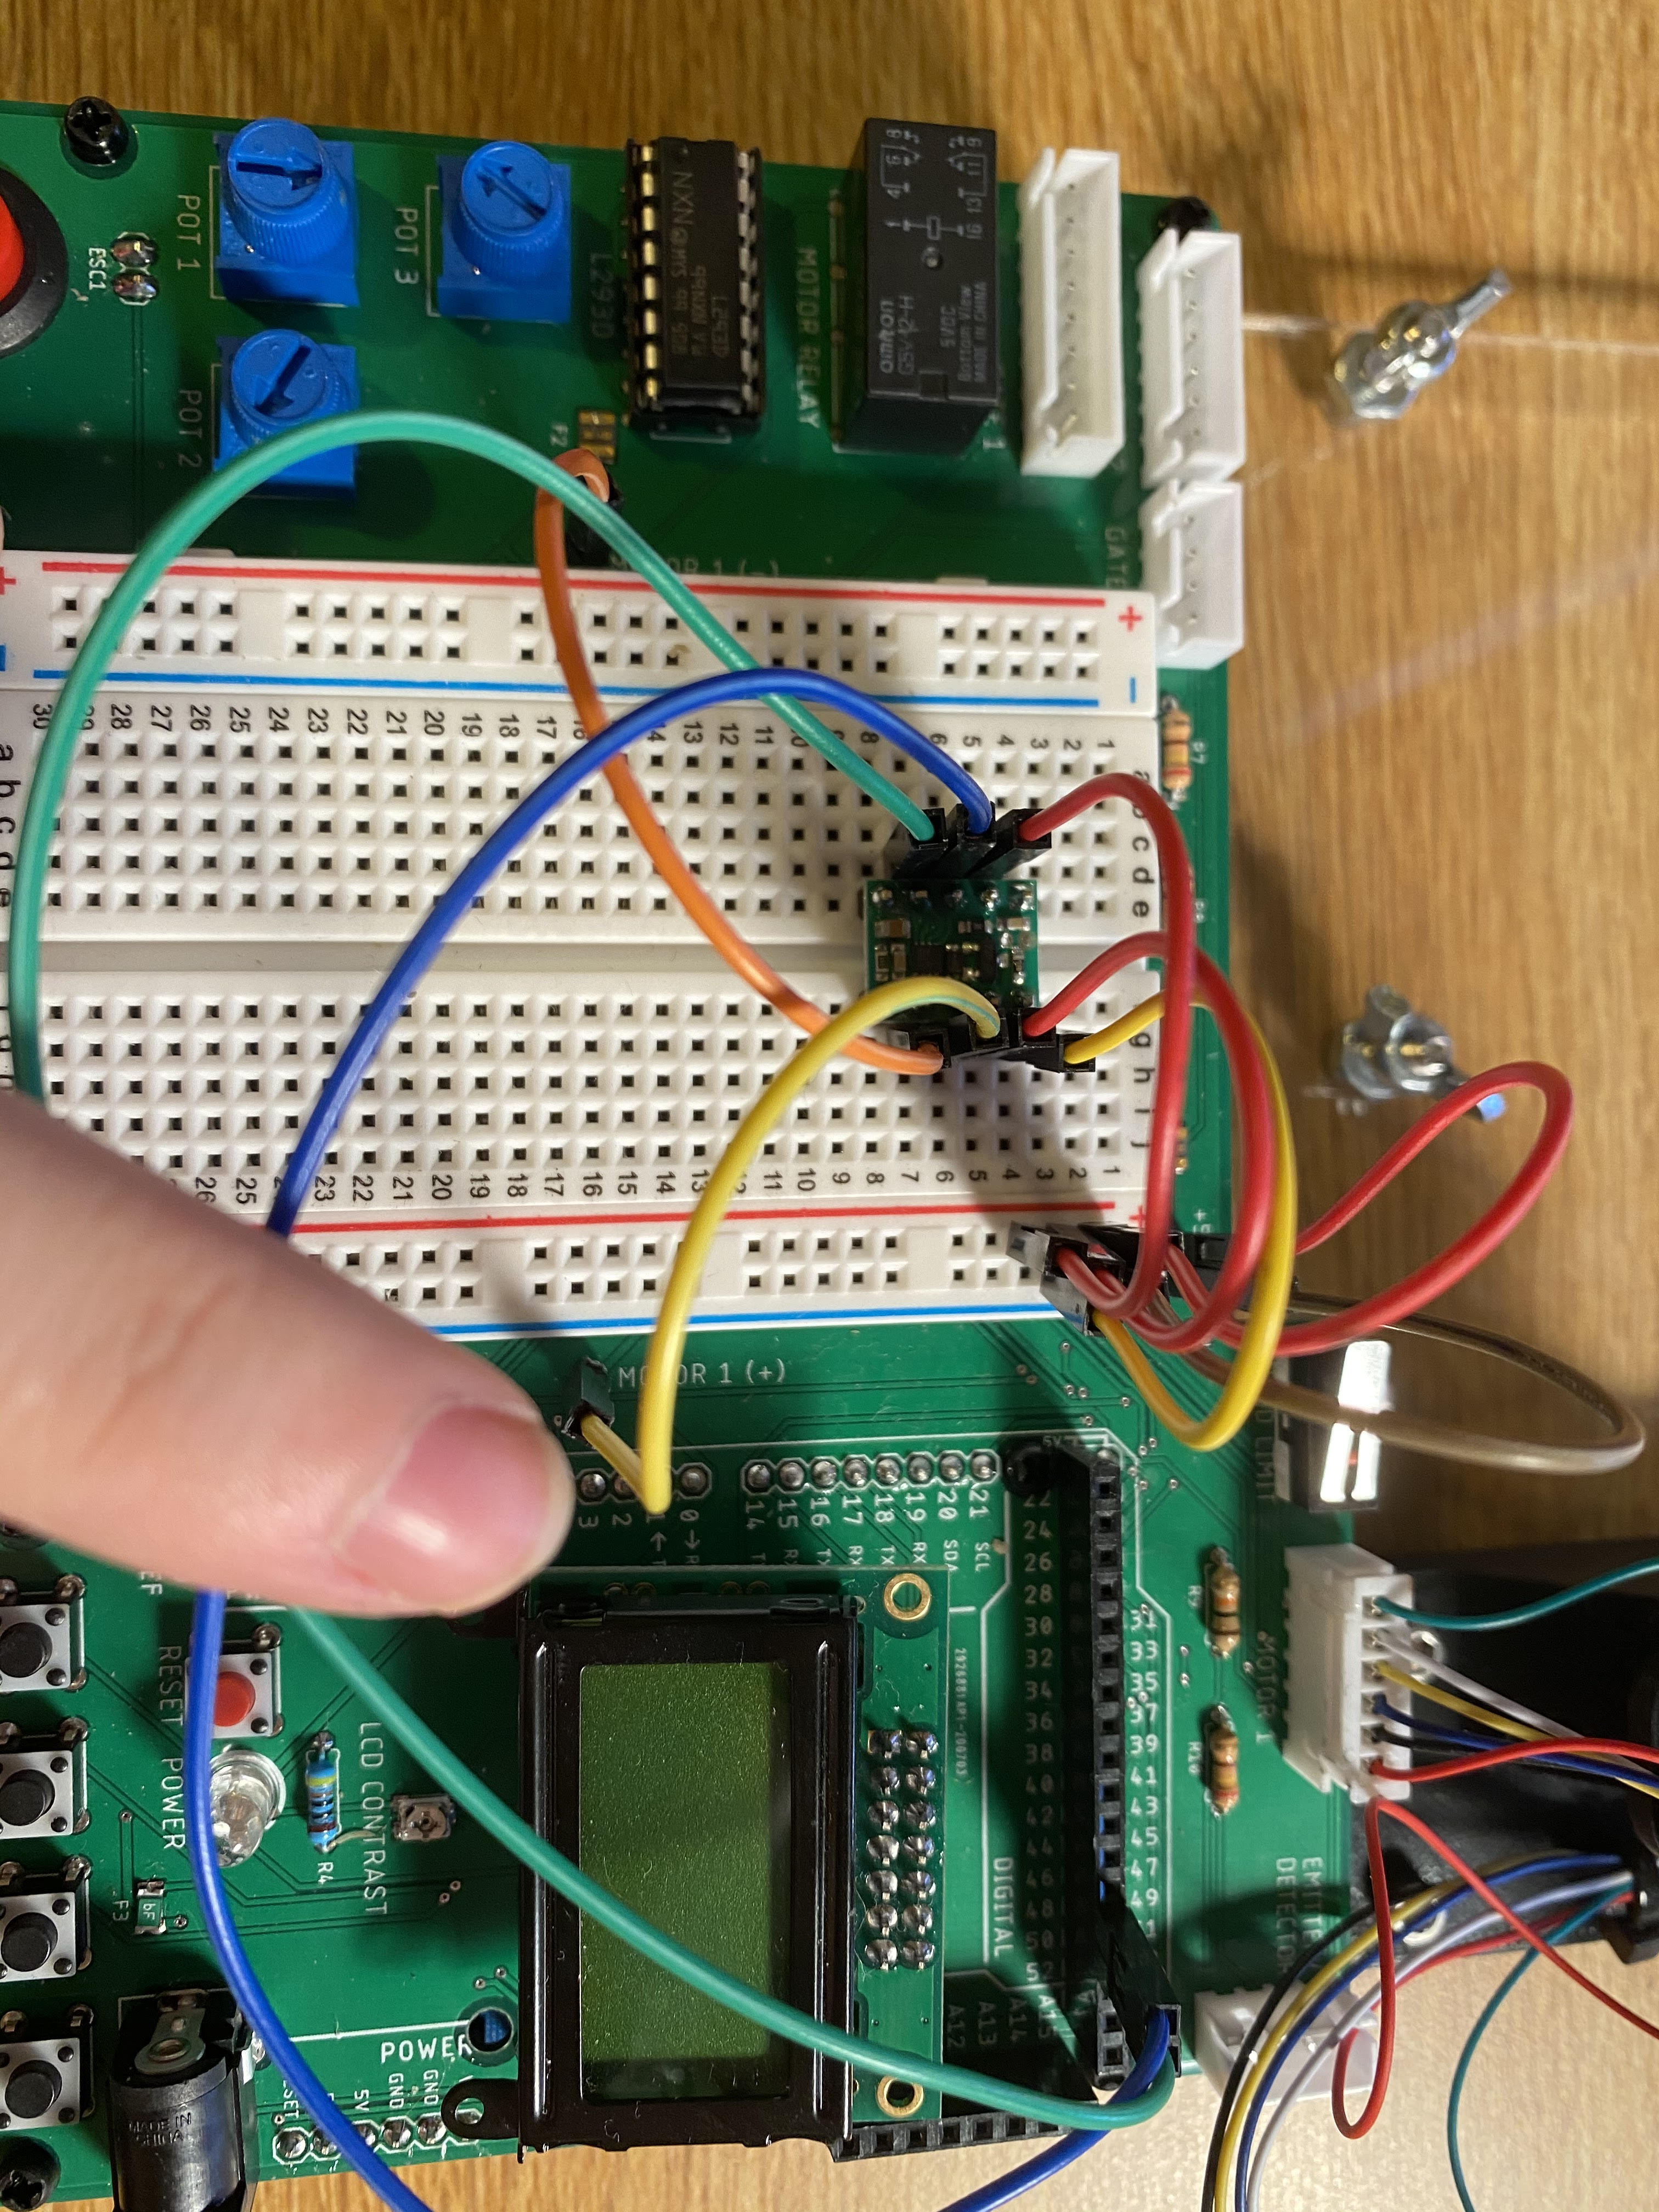

## Implementing a Controller for the "Motor Alone" Configuration

### *Model Construction:* Motor Alone

You may only have limited experience with closed-loop control, but you have already seen that you will need a plant transfer function in order to design a closed loop control system.  Therefore, you will need to experimentally establish suitable plant transfer functions for the 2 motor configurations we will control in this lab.

As you did in Lab 4, you will fit a dynamic model to the data. However, in this assignment, you won't need to determine the physical parameters (e.g. $J_m$, $b_m$, etc) because we know the SYSTEM WILL NOT CHANGE between the time we establish the plant behavior and the time we control the system.  

Because we don't expect the system to change, you can  characterize the plant's behavior directly in terms in the transfer function's numerical characteristics (e.g. steady state gain, time constant, damping ratio, and natural frequency, as appropriate).

To establish the plant response, you will first record an *OPEN LOOP* step response, because this represents how the system acts without closed loop control.

With the new H-bridge installed, make a copy of your Arduino code from Lab 4 to provide a step input for the motor-alone configuration. You will have to modify your Lab 4 code to work with the inputs/outputs from MOTOR 1 instead of MOTOR 2 as appropriate given the operation of the DRV8838 chip.

***Develop your transfer functions in the OCTAVE cells below for the motor alone configuration.  Plot your data and your fit on one set of axes. Additionally, display your plant transfer function:***

The motor alone system is first order and thus its plant transfer function has the following form: $G(s)H(s) = \frac{A}{s+a}$. In order to characterize this plant transfer function, I determined numerical values for $A$ and $a$. I first found $a$ by determining the time constant from the measured data and utilizing the relationship $\tau = -\frac{1}{p}$, where $p$ is the pole of the first order system (in this case $p = a$). Once the value of $a$ is determined, $A$ can be determined using the final value theorem:

$\Delta\Omega_{ss} = \lim_{s \to 0} sY(s) = \lim_{s \to 0} s \cdot \frac{U(s)}{s} \frac{A}{s+a}$ 

Therefore, $\Delta\Omega_{ss} = \frac{\Delta V_s A}{a}$.

Calculations for $A$ and $a$ are computed in the Octave cell below. 

omega0_unload =  23.670
omegass_unload =  54.151
tau_unload =  0.044220
a =  22.614
A =  281.35

Transfer function 'GH_unload' from input 'u1' to output ...

        281.3  
 y1:  ---------
      s + 22.61

Continuous-time model.


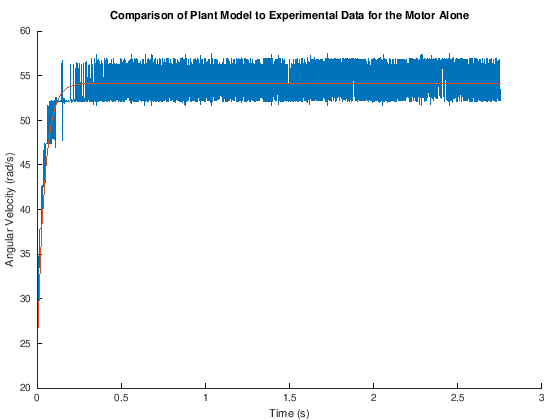

In [59]:
% loading data...
data_unload = load('StepResponse_Unweighted.txt');
time_unload = data_unload(:,1)*10^-6; % time (s)
Vs_unload = data_unload(:,3); % input voltage (V)
V0_unload = Vs_unload(1); % initial input voltage (V)
Vin_unload = Vs_unload(find(Vs_unload>V0_unload,1,'first')); % magnitude of input voltage after step (V)
Vstep_unload = Vin_unload - V0_unload; % magnitude of voltage step 
omega_unload = data_unload(:,4); % angular velocity (rad/s)
omega0_unload = omega_unload(1) % initial angular velocity (rad/s)
omegass_unload = mean(omega_unload(end-20:end)) % final steady state angular velocity (rad/s)

% finding time constant (tau)...
omegatau_unload = (0.632*(omegass_unload - omega0_unload))+omega0_unload;
tstart_unload = time_unload(find(Vs_unload>V0_unload,1,'first'));
tau_unload = time_unload(find(omega_unload<omegatau_unload,1,'last'))-tstart_unload
a = 1/tau_unload
A = ((omegass_unload - omega0_unload)*a)/(Vstep_unload)

% plotting model against experimental data...
s = tf('s');
GH_unload = A/(s+a)
[ysim_unload,tsim_unload]=step(GH_unload,time_unload(end)-tstart_unload);
ymodel_unload = (Vstep_unload*ysim_unload)+omega0_unload;

% plotting experimental data vs. the plant model...
figure
hold on;
plot(time_unload-tstart_unload,omega_unload)
plot(tsim_unload,ymodel_unload)
title('Comparison of Plant Model to Experimental Data for the Motor Alone')
xlabel('Time (s)')
ylabel('Angular Velocity (rad/s)')
xlim([0 3])
hold off

### *Controller Design:* Motor Alone

Using the plant transfer functions you developed from your data, design a proportional controller that will provide a closed loop time constant of 0.033 sec.  ***Perform the calculations in the OCTAVE cells and clearly display your calculated gain.***

The goal time constant was altered to be a third of the time constant of the motor alone. From this specification, the closed-loop pole cal be determined using the relation: $\tau = -\frac{1}{p}$. The proportional gain is able to be determined using the magnitude criterion:

$\lvert \frac{-1}{K_p} \rvert = \lvert \frac{A}{s+a} \rvert$ where the closed-loop pole is substituted in for $s$.

In [60]:
taud_unload = tau_unload/3 % desired time constant
pCL_unload = -1/taud_unload;
Kp_unload = abs(pCL_unload + a)/A

taud_unload =  0.014740
Kp_unload =  0.16076


### *Controller Validation:* Motor Alone

To assess the usefulness of your controller, you can compare your predicted responses to actual measured responses **while the system is under closed loop control**.  However, to perform the experiment you will need to modify your Arduino code so it implements your closed loop controller design. 

**SAVE THE CODE YOU USED TO GENERATE YOUR OPEN LOOP RESPONSE** in the section above. Then, in a new file, modify the code to implement **closed-loop control:**

* Use the potentiometers to set the desired angular velocity before and after a step input (instead of motor voltage).
* Similar to lab 1, POT1 will set an initial angular velocity.  When BTN1 is pressed, a step in angular velocity will be added.  The maximum requested angular velocity should be limited to 45 rad/s. 
* Display the initial velocity on the first line of the LCD display and the step change in velocity on the second line

In Block 4:
* Calculate the error between the current desired angular velocity and the measured angular velocity
* Calculate the voltage input to the motor based on your controller design
* Send the controller determined voltage to the H-Bridge  
* Do **not** print to the LCD while the controller is running. Delays are the enemy of closed loop control. Make sure that any Serial prints you employ use a baud rate of 115200, and that you have no artificial (added) delays in your code.

**Provide your Arduino code with the proper formatting in the markdown cell below:**


```javascript
//SSR_SWITCH represents the Stop/Safe/Ready switch connected to pin 23
//R1 represents the RUN1 BUT1ton connected to pin 25
//R2 represents the RUN1 BUT1ton connected to pin 25
//E_STOP represents the emergency stop BUT1ton connected to pin 4
//RWG_LED represents the ready/warning green LED connected to pin 41
//RWR_LED represents the ready/warning green LED connected to pin 39
//RFB_LED represents the run/fault blue LED connected to pin 43
//RFR_LED represents the run/fault red LED connected to pin 45
//MOTOR2_A represents motor 2 direction A connected to pin 6
//MOTOR2_B represents motor 2 direction B connected to pin 7
//MOTOR2_PWM represents motor 2 PWM connected to pin 8
//RELAY represents the motor relay connected to pin 37
//P1 represents potentiometer 1 connected to pin A0
//P2 represents potentiometer 2 connected to pin A1
//BUT1 represents button 1 connected to pin 29
//encoderChAPin represents channel A for the encoder connected to pin 20
//encoderChBPin represents channel B for the encoder connected to pin 21

//SWITCH represents the Stop/Safe/Ready switch reading (0 when in the ready position and 1 when in the safe/stop position)
//RUN1 represents the RUN1 BUT1ton reading (0 when pressed and 1 when not pressed)
//RUN2 represents the RUN1 BUT1ton reading (0 when pressed and 1 when not pressed)
//ESTOP represents the emergency stop BUT1ton reading (0 when pressed and 1 when not pressed)
//BTN1 represents the button 1 reading (0 when pressed and 1 when not pressed)
//POT1 represents the first potentiometer's reading (0-1021)
//POT2 represents the second potentiometer's reading (0-1021)

//SAFE represents the safe state
//FAULT represents the fault state
//READY represents the ready state
//WARNING represents the warning state
//RUNNING represents the running state

//safeToReady represents the transition from the safe to ready state
//readyToWarning represents the transition from the ready to the warning state
//warningLatch represents the latch on the warning state
//warningToRunning represents the transition from the warning to the running state
//warningToReady represents the transition from the warning to the ready state
//safeToFault represents the transition from the safe to the fault state
//readyToFault represents the transition from the ready to the fault state
//warningToFault represents the transition from the warning to the fault state
//runningToFault represents the transition from the running to the fault state
//faultToSafe represents the transition from the fault to the safe state
//readyToSafe represents the transition from the ready to the safe state
//warningToSafe represents the transition from the warning to the safe state
//runningToSafe represents the transition from the running to the safe state
//safeLatch represents the latch on the safe state
//faultLatch represents the latch on the fault state
//readyLatch represents the latch on the ready state
//runningLatch represents the latch on the running state

//TMR1 represents the timer and will return true if the time duration is exceeded
//SWITCH_OLD represents the last state of the stop/safe/ready switch
//ledState represents the state of the LED
//previousMillis represents the last time LED was updated
//interval represents the interval at which to blink the LED (milliseconds)
//desiredSpeed represents the desired speed of the motor (determined from potentiometer settings)
//inputVoltage represents the voltage being sent to the motor to produce the desired speed
//Kp represents the proportional gain value determined from controller design
//encoderCountShared represents the encoder count from both channels
//motorPosition represents the current motor position in radians
//pastPosition represents the motor's past position in radians
//motorSpeed represents the actual speed of the motor
//pastTime represents the previous time in microseconds
//timeElapsed represents the elapsed time between motor position measurements in microseconds
//POT1_speed represents the speed setting from the first potentiometer (0-45 rad/s)
//POT2_speed represents the speed setting from the second potentiometer (-45 to 45 rad/s)
//motor_count represents the count value being written to the motor (0-255)

#include <LiquidCrystal.h> //include LCD library

//initializing input and output pins
const int SSR_SWITCH = 23;
const int R1 = 25;
const int R2 = 27;
const int E_STOP = 4;
const int RWG_LED = 41;
const int RWR_LED = 39;
const int RFB_LED = 43;
const int RFR_LED = 45;
const int MOTOR1_PWM = 46;
const int MOTOR1_DIR = 48;
const int RELAY = 37;
const int P1 = A0;
const int P2 = A1;
const int BUT1 = 29;
int encoderChAPin = 2;   //Channel A pin for the encoder
int encoderChBPin = 3;   //Channel B pin for the encoder

// Pin numbers for LDC display
int lcd_rs_pin = 14;
int lcd_en_pin = 15;
int lcd_db4_pin = 16;
int lcd_db5_pin = 17;
int lcd_db6_pin = 18;
int lcd_db7_pin = 19;

//initializing states
bool SAFE = false;
bool FAULT = true;
bool READY = false;
bool WARNING = false;
bool RUNNING = false;

// initializing transitions
bool safeToReady = false;
bool readyToWarning = false;
bool warningLatch = false;
bool warningToRunning = false;
bool warningToReady = false;
bool safeToFault = false;
bool readyToFault = false;
bool warningToFault = false;
bool runningToFault = false;
bool faultToSafe = false;
bool readyToSafe = false;
bool warningToSafe = false;
bool runningToSafe = false;
bool safeLatch = false;
bool faultLatch = false;
bool readyLatch = false;
bool runningLatch = false;

// initializing miscellaneous variables
bool TMR1 = false;
bool SWITCH_OLD = true;
int ledState = LOW;
unsigned long previousMillis = 0;
const long interval = 250;
float desiredSpeed;
float inputVoltage;
float Kp = 0.16076;
volatile long encoderCountShared;
float motorPosition;
float pastPosition;
float motorSpeed;
unsigned long pastTime = 0;
float timeElapsed = 0;
float POT1_speed = 0;
float POT2_speed = 0;
float motor_count = 0;

LiquidCrystal LCD(lcd_rs_pin, lcd_en_pin, lcd_db4_pin, lcd_db5_pin, lcd_db6_pin, lcd_db7_pin);

void setup() {
  LCD.begin(8, 2); // initialize LCD
  Serial.begin(115200);
  pinMode(SSR_SWITCH, INPUT);
  pinMode(R1, INPUT_PULLUP);
  pinMode(R2, INPUT_PULLUP);
  pinMode(E_STOP, INPUT_PULLUP);
  pinMode(RWG_LED, OUTPUT);
  pinMode(RWR_LED, OUTPUT);
  pinMode(RFB_LED, OUTPUT);
  pinMode(RFR_LED, OUTPUT);
  pinMode(RELAY, OUTPUT);
  pinMode(P1, INPUT);
  pinMode(P2, INPUT);
  pinMode(BUT1, INPUT_PULLUP);

  //encoder
  attachInterrupt(digitalPinToInterrupt(encoderChAPin), EncoderChA, CHANGE);
  attachInterrupt(digitalPinToInterrupt(encoderChBPin), EncoderChB, CHANGE);
}

void loop() {
  noInterrupts();  //stop the interrupt system so the value doesn't change mid interrupt
  long encoderCount = encoderCountShared; //save the count value to a local variable
  interrupts();    //restart the interrupt system
  unsigned long currentMillis = millis(); //defining current time
  unsigned long currentTime = micros();

  // BLOCK 1: Process Inputs
  //----------------------------------------
  int SWITCH = digitalRead(SSR_SWITCH);
  int RUN1 = !digitalRead(R1); //negating so that this variable is 1 when pressed
  int RUN2 = !digitalRead(R2); //negating so that this variable is 1 when pressed
  int ESTOP = !digitalRead(E_STOP); //negating so that this variable is 1 when pressed
  int BTN1 = !digitalRead(BUT1); //negating so that this variable is 1 when pressed
  int POT1 = analogRead(P1);
  int POT2 = analogRead(P2);

  //call timer
  TMR1 = Timer(RUN1 && RUN2, 2000);

  // BLOCK 2: State Transition Logic
  //----------------------------------------
  safeToReady = SAFE && !SWITCH;
  readyToWarning = READY && RUN1 && RUN2;
  warningLatch = WARNING && !TMR1 && RUN1 && RUN2 && !SWITCH && !ESTOP;
  warningToRunning = WARNING && TMR1 && RUN1 && RUN2;
  warningToReady = WARNING && !TMR1 && !RUN1 || WARNING && !TMR1 && !RUN2;
  safeToFault = SAFE && ESTOP;
  readyToFault = READY && ESTOP;
  warningToFault = WARNING && ESTOP;
  runningToFault = RUNNING && ESTOP;
  faultToSafe = FAULT && !ESTOP && SWITCH && !SWITCH_OLD;
  readyToSafe = READY && SWITCH && !ESTOP;
  warningToSafe = WARNING && SWITCH && !ESTOP;
  runningToSafe = RUNNING && SWITCH && !ESTOP;
  safeLatch = SAFE && SWITCH && !ESTOP;
  faultLatch = FAULT && ESTOP || FAULT && !SWITCH || FAULT && SWITCH_OLD;
  readyLatch = READY && !RUN1 && !ESTOP && !SWITCH || READY && !RUN2 && !ESTOP && !SWITCH;
  runningLatch = RUNNING && !ESTOP && !SWITCH;

  // BLOCK 3: Update States
  //----------------------------------------
  SAFE = faultToSafe || readyToSafe || warningToSafe || runningToSafe || safeLatch;
  FAULT = safeToFault || readyToFault || warningToFault || runningToFault || faultLatch;
  READY = safeToReady || warningToReady || readyLatch;
  WARNING = readyToWarning || warningLatch;
  RUNNING = warningToRunning || runningLatch;

  // BLOCK 4: Set Outputs and Old Variables
  //----------------------------------------
  //calculating actual motor speed
  motorPosition = encoderCount * (PI / 300);
  timeElapsed = ((currentTime - pastTime) * 1E-6);
  motorSpeed = (motorPosition - pastPosition) / (timeElapsed);

  if (BTN1 == 1) { // if button 1 is pressed...
    desiredSpeed = POT1_speed + POT2_speed;
  } else {
    desiredSpeed = POT1_speed;
  }

  // making sure desired speed is not greater than 45 rad/s nor smaller than 0 rad/s
  if (desiredSpeed > 45.0) {
    desiredSpeed = 45.0;
  } else if (desiredSpeed < 0.0) {
    desiredSpeed = 0.0;
  }

  //determining error between desired and actual speed and computing input voltage
  float error = desiredSpeed - motorSpeed;
  inputVoltage = error * Kp;
  //making sure input voltage is not greater than 5.0 V nor smaller than 0.0 V
  if (inputVoltage < 0.0) {
    inputVoltage = 0.0;
  } else if (inputVoltage > 5.0) {
    inputVoltage = 5.0;
  }

  if (SAFE == 1) {
    digitalWrite(RELAY, LOW);
    digitalWrite(MOTOR1_PWM, LOW);
    digitalWrite(MOTOR1_DIR, LOW);

    //READY/WARNING LED illuminated green
    digitalWrite(RFR_LED, LOW);
    digitalWrite(RWR_LED, LOW);
    digitalWrite(RFB_LED, LOW);
    digitalWrite(RWG_LED, HIGH);

    // POT values
    POT1_speed = POT1 * (45.0 / 1021.0);
    POT2_speed = POT2 * (45.0 / 510.5) - 45.0;

    // printing to LCD
    LCD.clear();
    LCD.print("P1: ");
    LCD.print(POT1_speed);
    LCD.setCursor(0, 2);
    LCD.print("P2: ");
    LCD.print(POT2_speed);

  }

  if (FAULT == 1) {
    digitalWrite(RELAY, LOW);
    digitalWrite(MOTOR1_PWM, LOW);
    digitalWrite(MOTOR1_DIR, LOW);

    //RUN/FAULT LED flashing red and all other LEDs switched off
    if (currentMillis - previousMillis >= interval) {
      previousMillis = currentMillis;
      if (ledState == LOW) {
        ledState = HIGH;
      } else {
        ledState = LOW;
      }
    }

    digitalWrite(RWG_LED, LOW);
    digitalWrite(RWR_LED, LOW);
    digitalWrite(RFB_LED, LOW);
    digitalWrite(RFR_LED, ledState);

    // printing to LCD
    LCD.clear();
    LCD.print("FAULT");
  }

  if (READY == 1) {
    digitalWrite(RELAY, LOW);
    digitalWrite(MOTOR1_PWM, LOW);
    digitalWrite(MOTOR1_DIR, LOW);

    //READY/WARNING LED flashing green and all other LEDs switched off
    if (currentMillis - previousMillis >= interval) {
      previousMillis = currentMillis;
      if (ledState == LOW) {
        ledState = HIGH;
      } else {
        ledState = LOW;
      }
    }
    digitalWrite(RWR_LED, LOW);
    digitalWrite(RFB_LED, LOW);
    digitalWrite(RFR_LED, LOW);
    digitalWrite(RWG_LED, ledState);
  }

  if (WARNING == 1) {
    digitalWrite(RELAY, LOW);
    digitalWrite(MOTOR1_PWM, LOW);
    digitalWrite(MOTOR1_DIR, LOW);

    //READY/WARNING LED flashing red and all other LEDs switched off
    if (currentMillis - previousMillis >= interval) {
      previousMillis = currentMillis;
      if (ledState == LOW) {
        ledState = HIGH;
      } else {
        ledState = LOW;
      }
    }

    digitalWrite(RWG_LED, LOW);
    digitalWrite(RFR_LED, LOW);
    digitalWrite(RFB_LED, LOW);
    digitalWrite(RWR_LED, ledState);
  }

  if (RUNNING == 1) {
    motor_count = inputVoltage / 5 * 255;
    digitalWrite(RELAY, HIGH);
    analogWrite(MOTOR1_PWM, motor_count);
    digitalWrite(MOTOR1_DIR, LOW);

    //RUN/FAULT LED illuminated blue
    digitalWrite(RWG_LED, LOW);
    digitalWrite(RWR_LED, LOW);
    digitalWrite(RFR_LED, LOW);
    digitalWrite(RFB_LED, HIGH);

    //printing to Serial monitor...
    Serial.print(micros());
    Serial.print("\t");
    Serial.print(desiredSpeed);
    Serial.print("\t");
    Serial.print(motorSpeed);
    Serial.print("\t");
    Serial.print(motor_count);
    Serial.print("\t");
    Serial.print(inputVoltage);
    Serial.print("\t");
  }

  // setting "old" variables
  SWITCH_OLD = SWITCH;
  pastTime = currentTime;
  pastPosition = motorPosition;

  Serial.println();
}
```

Capture the response to a step input to the desired velocity and, in the OCTAVE cell below, graph the model predictions vs the actual data for your closed loop response on the **same axes**.


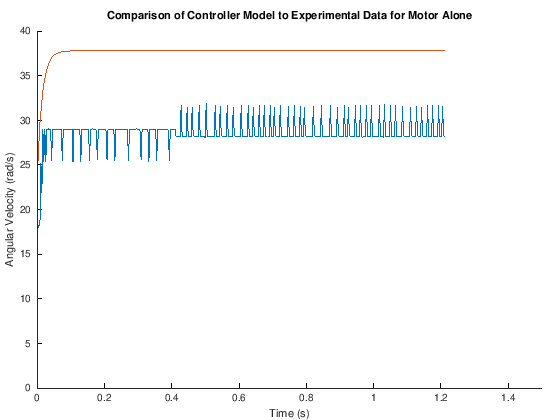

In [63]:
% loading data...
dataCL_unload = load('StepResponse_UnweightedCL.txt');
timeCL_unload = dataCL_unload(:,1)*10^-6; % time (s)
omegadCL_unload = dataCL_unload(:,2); % desired angular speed (rad/s)
omegadCL0_unload = omegadCL_unload(1); % initial desired angular speed (rad/s)
omegaCL_unload = dataCL_unload(:,3); % actual angular speed (rad/s)
VsCL_unload = dataCL_unload(:,5); % input voltage (V)
PWMCL_unload = dataCL_unload(:,4); % PWM counts 
tstartCL_unload = timeCL_unload(find(omegadCL_unload>omegadCL0_unload,1,'first')); % time at which step is applied (s)
desiredSpeed_unload = omegadCL_unload(find(omegadCL_unload>omegadCL0_unload,1,'first')); % final desired angular speed (rad/s)

% controller model...
GHCL_unload = (Kp_unload*GH_unload)/(1+(Kp_unload*GH_unload));
[ysimCL_unload,tsimCL_unload]=step(GHCL_unload,timeCL_unload(end)-tstartCL_unload);
ymodelCL_unload = ((desiredSpeed_unload - omegadCL0_unload)*ysimCL_unload) + omegadCL0_unload;

% plotting...
figure
hold on;
plot(timeCL_unload-tstartCL_unload,omegaCL_unload)
plot(tsimCL_unload,ymodelCL_unload)
title('Comparison of Controller Model to Experimental Data for Motor Alone')
xlabel('Time (s)')
ylabel('Angular Velocity (rad/s)')
xlim([0 1.5])
ylim([0 40])
hold off;

It is important that your control signal does not "saturate".  This occurs when you request a voltager HIGHER than you can deliver.  To confirm you aren't saturating, ***Plot the PWM values sent to the motor for the same time span as the data above to show that the applied PWM signal does not reach 255 at any time during the response.***

maxPWM =  246.47


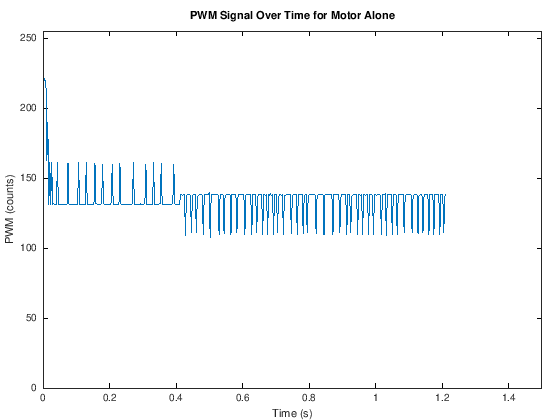

In [62]:
figure
plot(timeCL_unload-tstartCL_unload,PWMCL_unload)
title('PWM Signal Over Time for Motor Alone')
xlabel('Time (s)')
ylabel('PWM (counts)')
xlim([0 1.5])
ylim([0 255])

maxPWM = max(PWMCL_unload) % maximum count value written to motor over the course of this experiment

Examining your results, list below any questions you have regarding the comparison of the data to the models.  If you have no questions, list your conclusions.

Considering the comparison of the model to the experimental data for the system without closed-loop control, the model accurately predicts the behavior of the motor alone. Considering the comparison of the closed-loop controller model to the experimental data, the model somewhat accurately predict the behavior of the motor. However, the controller model overpredicts the steady state angular speed of the system. This is due to the fact that there will always be some steady state error associated with implementation of only proportional control. Overall, the closed-loop controller model predicts a steady state of approximately 37 rad/s, whereas the actual system only achieves approximately 30 rad/s. The system is able to achieve approximately 80% of the predicted model, which is adequete for proportional control.   

## Implementing a Controller for the "Motor-Spring-Load" Configuration

In Lab 4, you may have determined that both the motor alone and the motor-rigid shaft-load have a roughly first order response.  However, the motor-spring-load contains 3 significant independent energy storing elements and therefore will require a 3rd order model.  As before, expecting the physical elements of this system NOT to change, we will  establish the transfer function numerically for this system.  

However, since we don't have experience with 3rd order systems, we'll use our knowledge of superposition to allow us to use transfer function forms we are familiar with.  Specifically, the 3rd order response can be modeled as the combination of a response of a 1st order system to a step and the response of a 2nd order system to an impulse. This represents a total 3rd order response with two zeros after the transfer functions are combined, but separating the system into constituent parts allows us to fit the first and second order behavior in two separate steps.

This is shown graphically below:

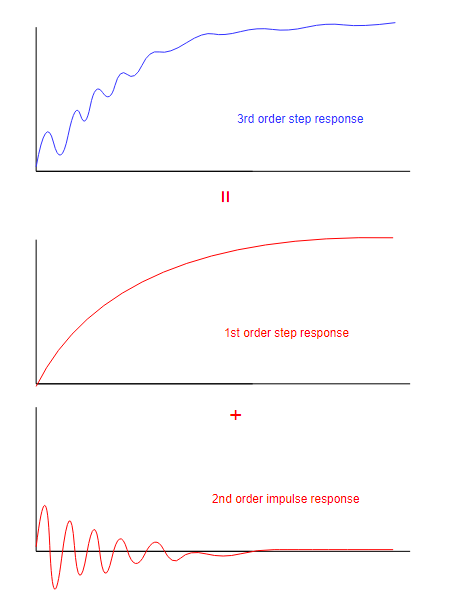

### *Model Construction:* Motor-Spring-Load

To find the 3rd order transfer function, first you need to find the transfer function that best approximates a first order step response that passes through the 3rd order response.  Then, you can subtract the 1st order response from the 3rd order data to extract the 2nd order "impulse portion" of the real system's response.  With the first and second order behavior separated, you can establish a transfer function for each by estimating the time constant, steady state, natural frequency, and the damping ratio as you have done before.

Once you have fit each part of the system's behavior, you can combine the two simpler transfer functions to form the total tranfer function for the 3rd order plant.

<font size=4>$ G_{3rd \, Order} = \frac{A}{s+a} + \frac{B \omega_n^2 s}{s^2 + 2 \zeta \omega_n s + \omega_n^2} $</font>

Install the Motor-Spring-Load configuration of your load inertia module and record an **OPEN LOOP STEP RESPONSE** by providing the Motor-Spring-Load a step change in VOLTAGE. Capture this step response and plot your data and your fit on one set of axes. Then, display your plant transfer function.  For clarity, display the plant model as a combination of individual first and second order transfer functions as shown above:

The first order pieces of this third order system were determined following the same procedure as outlined above. The values that need to be determined for the second order piece are the damping ratio($\zeta$), the natural frequency ($\omega_{n}$), and a scaling coefficient ($B$).The damping ratio was determined using the log decrement formula:

$\zeta = \frac{\frac{1}{n-1} (\ln(\frac{y_1}{y_n})}{\sqrt{4\pi^2 + (\frac{1}{n-1} (\ln(\frac{y_1}{y_n}))^2}}$ where $y_1$ represents the first peak and $y_n$ represents the n-th peak. For this calculation the first and third peaks were chosed: (0.01989s, 9.753 rad/s) and (0.1857s, 4.744 rad/s), respectively. 

Therefore, using the log decrement formula:

$\zeta = \frac{\frac{1}{n-1} (\ln(\frac{y_1}{y_n})}{\sqrt{4\pi^2 + (\frac{1}{n-1} (\ln(\frac{y_1}{y_n}))^2}} = \frac{\frac{1}{3-1} (\ln(\frac{9.753}{4.744})}{\sqrt{4\pi^2 + (\frac{1}{3-1} (\ln(\frac{9.753}{4.744}))^2}} = 0.057$

In order to eventually determine the natural frequency ($\omega_n$), the damped period  ($T_d$) and frequency ($\omega_d$) were determined:

$T_d = 0.1857s - 0.01989s = 0.1658s$

$\omega_d = \frac{2\pi}{T_d} = \frac{2\pi}{0.1658s} = 37.9 rad/s$

The natural frequency was determined using the following formula:

$\omega_n = \frac{\omega_d}{\sqrt{1-\zeta^2}} = \frac{37.9 rad/s}{\sqrt{1-(0.057)^2}} = 37.96 rad/s$

The scaling coefficient ($B$) was determined through iteration in order to fit the second order piece. 

startIndex_load =  328
Vin_load =  5
tau_load =  0.16800
a =  5.9522
A =  66.637


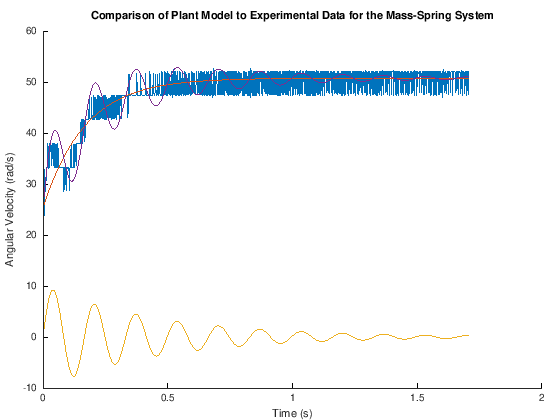

In [55]:
% loading data...
data_load = load('StepResponse_Weighted8.txt');
time_load = data_load(:,1)*10^-6; % time (s)
Vs_load = data_load(:,3); % voltages (V)
V0_load = Vs_load(1); % initial voltage (V)
startIndex_load = find(Vs_load>V0_load,1,'first') % finding index where votlage step occurs
tstart_load = time_load(startIndex_load); % time where voltage step occurs
Vin_load = Vs_load(startIndex_load) % magnitude of input voltage after step (V)
omega_load = data_load(:,4); % angular speed (rad/s)
omega0_load = mean(omega_load(1:20)); % initial angular speed (rad/s)
omegass_load = mean(omega_load(end-20:end)); % steady state angular speed after voltage step (rad/s)
omega_trimmed = omega_load(startIndex_load:end); % trimmed angular speeds to only include after the voltage step
time_trimmed = time_load(startIndex_load:end)-tstart_load; % trimmed time to only include after the voltage step

% finding time constant (tau)
omegatau_load = (0.632*(omegass_load - omega0_load))+omega0_load; 
tau_load = time_load(find(omega_load<omegatau_load,1,'last'))-tstart_load 
a = 1/tau_load
A = ((omegass_load-omega0_load)*a)/(Vin_load-V0_load)

% plotting model against experimental data...
s = tf('s');
GH_load1 = A/(s+a); % first order piece of third order system
[ysim_load1,tsim_load1]=step(GH_load1,time_trimmed);
ymodel_load1 = ((Vin_load-V0_load)*ysim_load1)+omega0_load;

figure
hold on;
plot(time_load(startIndex_load:end)-tstart_load,omega_load(startIndex_load:end))
plot(tsim_load1,ymodel_load1)
title('Comparison of Plant Model to Experimental Data for the Mass-Spring System')
xlabel('Time (s)')
ylabel('Angular Velocity (rad/s)')

% subtracting first order piece off of third order system...
omega2_load = omega_trimmed - ymodel_load1; % second order piece 
B = 0.117; % this value was determined through iteration
wn = 37.9556;
zeta = 0.057257;
GH_load2 = (B*wn^2*s)/(s^2+2*zeta*wn*s+wn^2); % second order piece of third order system
[ysim_load2,tsim_load2]=step(GH_load2,time_trimmed);
ymodel_load2 = ((Vin_load-V0_load)*ysim_load2);
plot(tsim_load2,ymodel_load2)

GH_load = A/(s+a)+ (B*wn^2*s)/(s^2+2*zeta*wn*s+wn^2); % entire third order system...
[ysim3,tsim3]=step(GH_load,time_load(startIndex_load:end)-tstart_load); 
ymodel3 = ((Vin_load-V0_load)*ysim3)+omega0_load;
plot(tsim3,ymodel3)
hold off;

### *Controller Design:* Motor-Spring-Load

Since you don't yet have tools to do the design of a proportional controller for a higher order system, we'll use **model order reduction** to proceed. "Model order reduction" is the act of representing a higher-order system as a lower-order one. In this case, you will use only the "First order portion" of your plant model in order to design your controller. For the purposes of controller design, you will ignore the "second order part" entirely during the design process.

Once you complete your design using the simplified plant model, you will have determined a "suitable" proportional gain for the system. This will allow you to see if your first order plant model is of sufficient fidelty to predict the actual behavior of the closed loop system during the *controller validation* step.

Determine the $k_p$ that will achieve a closed-loop time constant of 0.25 sec if we assume that the open loop system's response is modeled adequately by the first order part of the plant transfer function that we determined in section 4.1 (*the reduced order model*). Place your calculations in the code cell below.

ThThe proportional gain was determined following the same process outlined above. 

In [49]:
taud_load = 0.025; % desired time constant
pCL_load = -1/taud_load;
Kp_load = abs(pCL_load + a)/A % proportional gain

Kp_load =  0.51094


### *Controller Validation:* Motor-Spring-Load

Implement your closed loop controller on the real system. Then, compare the measured response to the predicted response for a step input of a magnitude you choose. Compute predicted responses using both the *reduced order model* AND the *third order model* under the direction of the feedback controller you designed. Make sure the signal sent to the motor does not saturate during your closed loop step response tests.

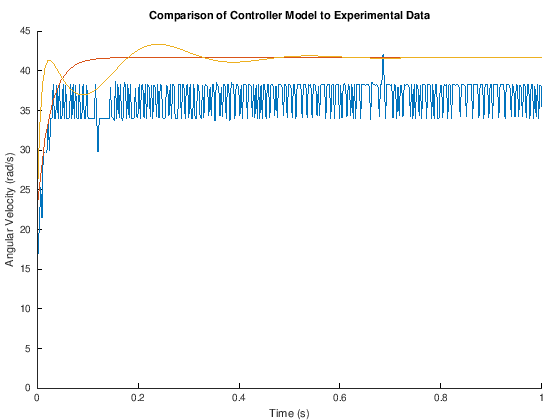

In [65]:
% loading data...
dataCL_load = load('StepResponse_WeightedCL.txt');
timeCL_load = dataCL_load(:,1)*10^-6; % time (s)
omegad_CL_load = dataCL_load(:,2); % desired angular speed (rad/s)
omegad0_CL_load = omegad_CL_load(1); % initial desired angular speed (rad/s)
omega_CL_load = dataCL_load(:,3); % actual angular speed (rad/s) 
VsCL_load = dataCL_load(:,4); % input voltage (V)
tCL_start_load = timeCL_load(find(omegad_CL_load>omegad0_CL_load,1,'first')); % time where voltage step occurs
desiredSpeed_load = omegad_CL_load(find(omegad_CL_load>omegad0_CL_load,1,'first')); % final desired speed (rad/s)

% controller model...
GH_CL_load = (Kp_load*GH_load1)/(1+(Kp_load*GH_load1)); % first order piece
[ysimCL_load,tsimCL_load]=step(GH_CL_load,2);
ymodelCL_load = ((desiredSpeed_load-omegad0_CL_load)*ysimCL_load)+omegad0_CL_load;

GH_CL_load3 = (Kp_load*GH_load)/(1+(Kp_load*GH_load)); % entire third order system
[ysimCL_load3,tsimCL_load3]=step(GH_CL_load3,2);
ymodelCL_load3 = ((desiredSpeed_load-omegad0_CL_load)*ysimCL_load3)+omegad0_CL_load(1);

% plotting...
figure
hold on;
plot(timeCL_load-tCL_start_load,omega_CL_load)
plot(tsimCL_load,ymodelCL_load)
plot(tsimCL_load3,ymodelCL_load3)
title('Comparison of Controller Model to Experimental Data')
xlabel('Time (s)')
ylabel('Angular Velocity (rad/s)')
xlim([0 1])
ylim([0 45])
hold off;

Discuss the impact of the proportional control on the actual system response.  Since this is a higher order system, are there changes in the system response beyond the time constant?

The implementation of proportional control actually caused a less pronounced second order piece or oscillations. The oscillations are very clear on the figure that includes the plant model and experimental data. However, implementation of proportional control makes the oscillations less prominant. Thus, I would say that the first order controller model more accurately depicts the actual system's response. 

We also still see the presence of steady state error in comparing both controller models to the actual experimental data. This continues to reinforce the idea that there is always some inherent error associated with implementation of only proportional control. 